In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font',**{'family':'serif','serif':['Palatino'],'size': 18})
rc('text', usetex=True)
rc('lines', **{'linewidth':3.0})
rc('axes', **{'labelsize':22})

I'll generate some data from a sine with unit variance and try out Gaussian process regression!  First, I'll plot the data along with the model from which it was drawn.

(-4, 4)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


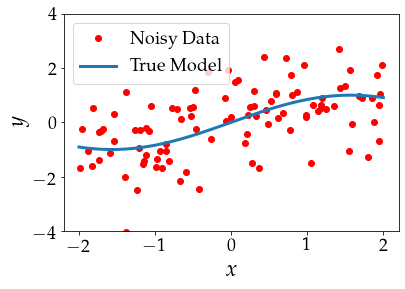

In [2]:
sig_data_true = 1
xfull = np.linspace(-2, 2, 200)
x = np.random.uniform(-2, 2, 100)
y = np.sin(x) + np.random.randn(len(x))*sig_data_true

plt.plot(x, y, 'ro')
plt.plot(xfull, np.sin(xfull))
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.legend(["Noisy Data", "True Model"])
plt.ylim(-4, 4)

And now I'll implement a simple Gaussian process regression on these data.  You can tune the values $a$ and $h$, the hyperparameters of the covariance function, to see what effect they have.

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


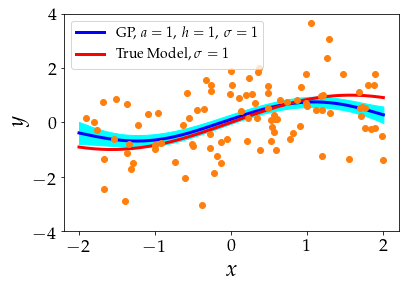

In [3]:
# Definition of my covariance function

def K(x, y, a, h):
    _x, _y = np.meshgrid(x, y)
    return a**2*np.exp(-(_x - _y)**2/(2*h**2))

# These two are hyperparameters for the Gaussian process covariance function.
a = 1
h = 1
# This is my assumed uncertainty in the data
sig_data = 1

Cov_data = np.identity(len(x))*sig_data**2
Kinv = np.linalg.inv(K(x, x, a, h) + Cov_data)

# This is the best estimate for all of the x values in xfull from the Gaussian process regression.
ymean = np.linalg.multi_dot([K(x, xfull, a, h), Kinv, y])

# And this is the variance.  
yvar = K(xfull, xfull, a, h) 
yvar -= np.linalg.multi_dot([K(x, xfull, a, h), Kinv, K(xfull, x, a, h)])
# I'll compute the standard deviation of each point to plot the 1-sigma envelope of models.
gp_err = np.sqrt(np.diag(yvar))

plt.fill_between(xfull, ymean - gp_err, ymean + gp_err, color='cyan')
plt.plot(xfull, ymean, color='b')
plt.plot(xfull, np.sin(xfull), color='r')
plt.legend([r"GP, $a=%.0f,\,h=%.0f,\,\sigma=%.0f$" % (a, h, sig_data), 
            r"True Model, $\sigma=1$"], fontsize=14)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.ylim(-4, 4)
plt.plot(x, y, 'o', color='C1')
plt.show()